<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Project By Erez Levy - Part V - One Hot Encoding

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import tmdb_model as pickel file from my Google Drive

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
         id  number_of_episodes  vote_average  genres  origin_country  \
0   39280.0           -0.840914     -0.787969      19              19   
1  222838.6           -0.525367      1.400545      12              12   
2  222838.6           -0.209820     -0.787969      19               5   
3   34835.0           -0.083601      1.031056      19              12   
4   42598.0           -0.840914     -0.787969       5              20   

   episode_run_time  popularity_log  air_time  log_popularity  \
0          0.200501        0.385265      56.0        0.904220   
1          1.031072        1.002042      28.0        1.314755   
2         -1.045356        0.385265      63.0        0.904220   
3          0.200501        1.216670      77.0        1.476119   
4         -1.045356        0.385265      56.0        0.904220   

   weighted_vote_average  populari

# One-Hot Encoding

Convert categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. This typically involves creating binary columns for each category in a categorical feature.

In [2]:
tmdb_hot=tmdb_model.copy()
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     82872 non-null  float64
 1   number_of_episodes     82872 non-null  float64
 2   vote_average           82872 non-null  float64
 3   genres                 82872 non-null  int64  
 4   origin_country         82872 non-null  int64  
 5   episode_run_time       82872 non-null  float64
 6   popularity_log         82872 non-null  float64
 7   air_time               82872 non-null  float64
 8   log_popularity         82872 non-null  float64
 9   weighted_vote_average  82872 non-null  float64
 10  popularity_score       82872 non-null  float64
 11  popularity             82872 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.6 MB


# Corroletion TMDB Dataset


Correlation measures the strength and direction of a linear relationship between two variables. In the TMDB dataset, this could be the relationship between features like:

**vote_average and popularity:**

 Do movies with higher average ratings tend to be more popular?

**number_of_episodes and total_runtime:**

 Does the number of episodes in a show correlate with its total runtime?

**vote_count and popularity_score:**

 Is there a connection between the number of votes a show receives and its calculated popularity score?

**Spearman's Rank Correlation**

The method='spearman' argument specifies that Spearman's rank correlation is used. This method is non-parametric, meaning it doesn't assume a normal distribution of the data. It assesses the monotonic relationship between variables – whether they tend to increase or decrease together, regardless of the specific shape of the relationship.

**Interpreting Correlation Values**

The correlation coefficient ranges from -1 to +1:

+1: Perfect positive correlation. As one variable increases, the other increases proportionally.
-1: Perfect negative correlation. As one variable increases, the other decreases proportionally.
0: No correlation. There is no linear relationship between the variables.
Values between -1 and +1 indicate varying degrees of correlation:

Strong correlation: Values closer to -1 or +1 (e.g., -0.8, +0.7)
Moderate correlation: Values around -0.5 or +0.5
Weak correlation: Values closer to 0 (e.g., -0.2, +0.3)

**Example Interpretation**

If the correlation between vote_average and popularity is +0.7, it suggests a strong positive correlation. This means that TV shows with higher average ratings tend to be more popular.

**Important Considerations**

Correlation does not imply causation:

 Even if two variables are strongly correlated, it doesn't mean that one causes the other. There could be other factors influencing both variables.

**Context is crucial:**

 The interpretation of correlation should be based on the specific dataset and domain knowledge. A correlation of 0.5 might be considered strong in some contexts but weak in others.
How to use the correlation results:

**Feature Selection:**

 Identify features that are strongly correlated with your target variable (e.g., popularity). These features are likely to be important predictors in your machine learning model.
Feature Engineering:

 Consider creating new features by combining correlated features. For example, you could create a feature that combines 'vote_average' and 'vote_count' to capture a more comprehensive measure of audience approval.

**Multicollinearity:**

 If you find very strong correlations between predictor features (features you are using to predict your target), you might want to remove one of the highly correlated features to avoid multicollinearity issues in your model. Multicollinearity can make it difficult to interpret the individual effects of features and can lead to unstable model estimates.

In [3]:
tmdb_hot.corr(method='spearman')

,id,number_of_episodes,vote_average,genres,origin_country,episode_run_time,popularity_log,air_time,log_popularity,weighted_vote_average,popularity_score,popularity
id,1.000000,0.151240,0.017624,-0.151907,-0.128814,-0.175727,0.029137,-0.284278,0.029701,-0.022484,0.048546,0.029701
number_of_episodes,0.151240,1.000000,0.389810,-0.269017,-0.235824,0.234923,0.698037,0.444452,0.697672,0.422774,0.600855,0.697672
vote_average,0.017624,0.389810,1.000000,-0.227608,-0.091620,0.252656,0.563776,0.155639,0.563701,0.946638,0.875032,0.563701
genres,-0.151907,-0.269017,-0.227608,1.000000,0.143679,-0.127473,-0.264948,-0.027125,-0.265107,-0.235050,-0.291398,-0.265107
origin_country,-0.128814,-0.235824,-0.091620,0.143679,1.000000,-0.161231,-0.182608,0.009174,-0.182903,-0.095769,-0.161210,-0.182903
episode_run_time,-0.175727,0.234923,0.252656,-0.127473,-0.161231,1.000000,0.319757,0.058067,0.319833,0.280377,0.319765,0.319833
popularity_log,0.029137,0.698037,0.563776,-0.264948,-0.182608,0.319757,1.000000,0.286875,0.999877,0.642033,0.858446,0.999877
air_time,-0.284278,0.444452,0.155639,-0.027125,0.009174,0.058067,0.286875,1.000000,0.286299,0.189752,0.225764,0.286299
log_popularity,0.029701,0.697672,0.563701,-0.265107,-0.182903,0.319833,0.999877,0.286299,1.000000,0.641880,0.858438,1.000000
weighted_vote_average,-0.022484,0.422774,0.946638,-0.235050,-0.095769,0.280377,0.642033,0.189752,0.641880,1.000000,0.900617,0.641880


# HeatMap Dataset

<Axes: >

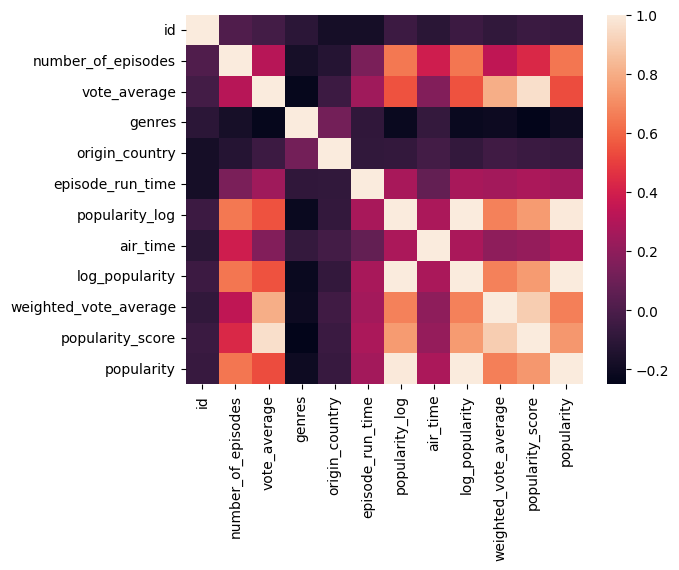

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(tmdb_hot.corr())

In [5]:
tmdb_hot.columns

Index(['id', 'number_of_episodes', 'vote_average', 'genres', 'origin_country',
       'episode_run_time', 'popularity_log', 'air_time', 'log_popularity',
       'weighted_vote_average', 'popularity_score', 'popularity'],
      dtype='object')

# The Chi-Square Test

The Chi-Square test is a statistical method used to determine if there is a significant association between two categorical variables. It essentially compares the observed frequencies of different combinations of categories in your data to the expected frequencies if there were no relationship between the variables. If the observed frequencies deviate significantly from the expected frequencies, it suggests that there is a statistically significant association between the variables.

The Chi-Square test compares the observed frequencies of different combinations of categories in your data to the expected frequencies if there were no relationship between the variables. If the observed frequencies deviate significantly from the expected frequencies, it suggests that there is an association between the variables.

Example (Correlation)

Analyzing the correlation between a TV show's popularity and its vote average in tmdb_eda DataFrame. If the a p-value of 0.0000 for this correlation, it means there's a statistically significant relationship between popularity and vote average.

# Chi-Square testing between origin_country & popularity

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'genres', 'origin_country',
        'episode_run_time','weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'production_companies')
contingency_table = pd.crosstab(df_chi['origin_country'], df_chi['popularity'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 214123.8113
P-Value: 0.0000
Degrees of Freedom: 170568


#Chi-Square testing between genres & episode_run_time

A small p-value (typically less than 0.05) indicates that the observed data is unlikely to occur by chance alone, suggesting a significant association between the variables.

In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'genres', 'origin_country',
        'episode_run_time','weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'spoken_languages')
contingency_table = pd.crosstab(df_chi['genres'], df_chi['episode_run_time'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 28706.6636
P-Value: 0.0000
Degrees of Freedom: 1120


# The Chi-Square Test between weighted_vote_average & popularity

A small p-value (typically less than 0.05) indicates that the observed data is unlikely to occur by chance alone, suggesting a significant association between the variables.

In [10]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select specified columns
selected_columns = ['id', 'number_of_episodes', 'genres', 'origin_country',
        'episode_run_time','weighted_vote_average', 'popularity_score', 'popularity']
tmdb_chi = tmdb_hot[selected_columns]
df_chi = tmdb_chi.dropna() # Changed df_chi to tmdb_chi to assign the DataFrame

# Select two categorical columns for Chi-Square testing (e.g., 'origin_country' vs 'networks')
contingency_table = pd.crosstab(df_chi['weighted_vote_average'], df_chi['popularity'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi-Square Statistic: 53124976.0925
P-Value: 0.0000
Degrees of Freedom: 21330476


#Missing

Understanding Missing Data in TMDB

Missing data is a common occurrence in real-world datasets like TMDB. It means that for certain TV shows, some information might not have been collected or is unavailable. In your code, you are using the tmdb_hot DataFrame, which is a copy of your original dataset likely after some initial processing.

Identifying Missing Values

Your code uses these methods to identify missing data:

tmdb_hot.isnull().head(): This displays the first few rows of a DataFrame where True indicates a missing value and False indicates a non-missing value for each cell. It provides a quick visual check.

sns.heatmap(tmdb_hot.isnull(), yticklabels=False, cbar=False): This creates a heatmap visualization where missing values are represented by a different color (usually darker). It gives a broader overview of the missing data pattern across your dataset.

In [12]:
tmdb_hot.isnull().head()

,id,number_of_episodes,vote_average,genres,origin_country,episode_run_time,popularity_log,air_time,log_popularity,weighted_vote_average,popularity_score,popularity
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

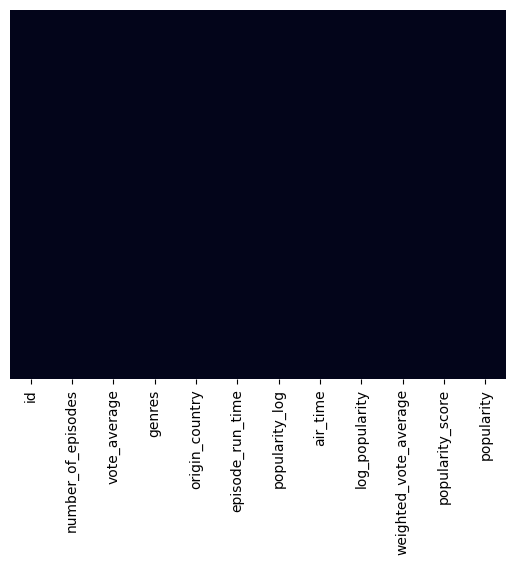

In [13]:
sns.heatmap(tmdb_hot.isnull(), yticklabels=False, cbar=False)

# Missing Values Analysis and Imputation

Understanding Missing Data in TMDB

Missing data is a common occurrence in real-world datasets like TMDB. It means that for certain TV shows, some information might not have been collected or is unavailable. In your code, you are using the tmdb_hot DataFrame, which is a copy of your original dataset likely after some initial processing.

Identifying Missing Values

In [14]:
print(tmdb_hot.isnull().sum())

id                       0
number_of_episodes       0
vote_average             0
genres                   0
origin_country           0
episode_run_time         0
popularity_log           0
air_time                 0
log_popularity           0
weighted_vote_average    0
popularity_score         0
popularity               0
dtype: int64


# Outliers that change correlation or distribution

In [15]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     82872 non-null  float64
 1   number_of_episodes     82872 non-null  float64
 2   vote_average           82872 non-null  float64
 3   genres                 82872 non-null  int64  
 4   origin_country         82872 non-null  int64  
 5   episode_run_time       82872 non-null  float64
 6   popularity_log         82872 non-null  float64
 7   air_time               82872 non-null  float64
 8   log_popularity         82872 non-null  float64
 9   weighted_vote_average  82872 non-null  float64
 10  popularity_score       82872 non-null  float64
 11  popularity             82872 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.6 MB


In [16]:
tmdb_hot.corr()

,id,number_of_episodes,vote_average,genres,origin_country,episode_run_time,popularity_log,air_time,log_popularity,weighted_vote_average,popularity_score,popularity
id,1.000000,0.008989,-0.028323,-0.108546,-0.179218,-0.180271,-0.053996,-0.111811,-0.054672,-0.085883,-0.055225,-0.067548
number_of_episodes,0.008989,1.000000,0.315536,-0.174916,-0.125824,0.138873,0.644383,0.388159,0.640539,0.338292,0.432183,0.639108
vote_average,-0.028323,0.315536,1.000000,-0.235440,-0.051218,0.246745,0.548798,0.163347,0.547789,0.801057,0.956514,0.533338
genres,-0.108546,-0.174916,-0.235440,1.000000,0.116782,-0.089300,-0.220358,-0.077394,-0.218320,-0.207531,-0.250483,-0.202685
origin_country,-0.179218,-0.125824,-0.051218,0.116782,1.000000,-0.089282,-0.082066,-0.028127,-0.082328,-0.036169,-0.057023,-0.069651
episode_run_time,-0.180271,0.138873,0.246745,-0.089300,-0.089282,1.000000,0.271542,0.071126,0.270158,0.254631,0.280551,0.255957
popularity_log,-0.053996,0.644383,0.548798,-0.220358,-0.082066,0.271542,1.000000,0.277572,0.999091,0.667911,0.743020,0.994533
air_time,-0.111811,0.388159,0.163347,-0.077394,-0.028127,0.071126,0.277572,1.000000,0.273779,0.198370,0.217096,0.280670
log_popularity,-0.054672,0.640539,0.547789,-0.218320,-0.082328,0.270158,0.999091,0.273779,1.000000,0.669342,0.742974,0.995926
weighted_vote_average,-0.085883,0.338292,0.801057,-0.207531,-0.036169,0.254631,0.667911,0.198370,0.669342,1.000000,0.901906,0.666984


# Correlation with Outliers


There are several ways to deal with outliers when calculating correlation:

**Remove outliers:**
If the outliers are due to errors in data collection or entry, they can be removed from the dataset. However, it's important to carefully consider the reasons for removing outliers and to document the process.

**Transform the data:**
Transforming the data using a logarithmic or other transformation can reduce the impact of outliers on correlation.

**Use a robust correlation measure:**
Robust correlation measures, such as Spearman's rank correlation, are less sensitive to outliers than Pearson's correlation.

# Calculate correlations with outliers

Understanding the Impact of Outliers on Correlation

Outliers are data points that significantly deviate from the overall pattern of your data. They can have a substantial impact on correlation calculations, potentially leading to misleading results. Here's why:

**Inflated or Deflated Correlation:**

Outliers can artificially inflate or deflate the correlation coefficient, making the relationship between variables appear stronger or weaker than it actually is.

**Distorted Relationships:**

Outliers can distort the linear relationship between variables, making it difficult to accurately assess the true correlation.

In [17]:
import numpy as np
from scipy import stats

# Calculate correlations with outliers
correlation_with_outliers = tmdb_hot.corr()

# Calculate correlations with outliers
outlier_threshold = 3.0  # Adjust as needed

# Find indices of outliers
outlier_indices = np.where(np.abs(stats.zscore(tmdb_hot.select_dtypes(include=np.number))) > outlier_threshold) #Only calculate zscore for numerical features.
print("Correlation with Outliers:")
print(correlation_with_outliers)

Correlation with Outliers:
                             id  number_of_episodes  vote_average    genres  \
id                     1.000000            0.008989     -0.028323 -0.108546   
number_of_episodes     0.008989            1.000000      0.315536 -0.174916   
vote_average          -0.028323            0.315536      1.000000 -0.235440   
genres                -0.108546           -0.174916     -0.235440  1.000000   
origin_country        -0.179218           -0.125824     -0.051218  0.116782   
episode_run_time      -0.180271            0.138873      0.246745 -0.089300   
popularity_log        -0.053996            0.644383      0.548798 -0.220358   
air_time              -0.111811            0.388159      0.163347 -0.077394   
log_popularity        -0.054672            0.640539      0.547789 -0.218320   
weighted_vote_average -0.085883            0.338292      0.801057 -0.207531   
popularity_score      -0.055225            0.432183      0.956514 -0.250483   
popularity            -0.

# Heatmap-Correlation with Outliers

<Axes: >

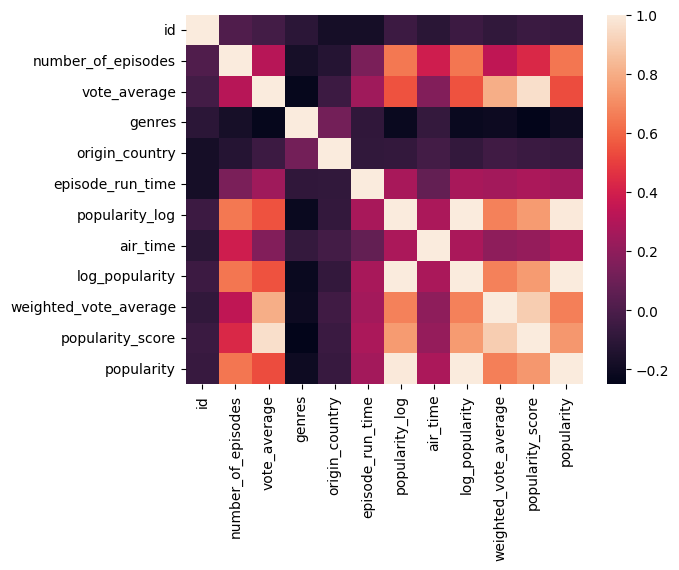

In [18]:
sns.heatmap(correlation_with_outliers)

# Analysing outliers that change either correlation or distribution

In [19]:
tmdb_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     82872 non-null  float64
 1   number_of_episodes     82872 non-null  float64
 2   vote_average           82872 non-null  float64
 3   genres                 82872 non-null  int64  
 4   origin_country         82872 non-null  int64  
 5   episode_run_time       82872 non-null  float64
 6   popularity_log         82872 non-null  float64
 7   air_time               82872 non-null  float64
 8   log_popularity         82872 non-null  float64
 9   weighted_vote_average  82872 non-null  float64
 10  popularity_score       82872 non-null  float64
 11  popularity             82872 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.6 MB


In [20]:
import numpy as np
from scipy import stats

# Assuming 'tmdb_hot' is your DataFrame

outliers_change_corr_or_dist = []  # Initialize an empty list

# Set the Z-score threshold
threshold = 2.5  # Adjust as needed

# Calculate Z-scores for numerical features
z_scores = np.abs(stats.zscore(tmdb_hot.select_dtypes(include=np.number)))

# Find outlier indices
outlier_indices = np.where(z_scores > threshold)

# If an outlier is detected, add its index to the list
# The change is on this line, we are now iterating through outlier_indices and appending to the list
for outlier_index in outlier_indices[0]:
    outliers_change_corr_or_dist.append(outlier_index)

# Print the outliers that change either correlation or distribution
print("Outliers changing either correlation or distribution:", outliers_change_corr_or_dist)

# Print outlier indices and corresponding values
print("Outlier Indices:", outlier_indices)
#print("Outlier Values:", tmdb_hot.iloc[outlier_indices])  # Uncomment to see values

Outliers changing either correlation or distribution: [np.int64(12), np.int64(41), np.int64(51), np.int64(57), np.int64(72), np.int64(109), np.int64(136), np.int64(159), np.int64(211), np.int64(237), np.int64(238), np.int64(260), np.int64(285), np.int64(297), np.int64(334), np.int64(348), np.int64(385), np.int64(423), np.int64(606), np.int64(609), np.int64(611), np.int64(628), np.int64(681), np.int64(688), np.int64(690), np.int64(692), np.int64(750), np.int64(775), np.int64(775), np.int64(823), np.int64(943), np.int64(988), np.int64(1027), np.int64(1034), np.int64(1071), np.int64(1080), np.int64(1085), np.int64(1114), np.int64(1124), np.int64(1173), np.int64(1296), np.int64(1305), np.int64(1337), np.int64(1379), np.int64(1420), np.int64(1422), np.int64(1497), np.int64(1550), np.int64(1653), np.int64(1669), np.int64(1751), np.int64(1760), np.int64(1760), np.int64(1798), np.int64(1845), np.int64(1852), np.int64(1858), np.int64(1881), np.int64(1892), np.int64(1913), np.int64(1933), np.int

# Remove outliers changing either correlation or distribution from the DataFrame

In [21]:
# Remove outliers changing either correlation or distribution from the DataFrame

tmdb_filtered = tmdb_hot.drop(index=tmdb_hot.index[outliers_change_corr_or_dist]) # Use tmdb_hot.index to get correct labels
#if there were any unnacesary outliers, they are now cleaned
tmdb_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79709 entries, 0 to 82871
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     79709 non-null  float64
 1   number_of_episodes     79709 non-null  float64
 2   vote_average           79709 non-null  float64
 3   genres                 79709 non-null  int64  
 4   origin_country         79709 non-null  int64  
 5   episode_run_time       79709 non-null  float64
 6   popularity_log         79709 non-null  float64
 7   air_time               79709 non-null  float64
 8   log_popularity         79709 non-null  float64
 9   weighted_vote_average  79709 non-null  float64
 10  popularity_score       79709 non-null  float64
 11  popularity             79709 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 7.9 MB


# Calculate Correlation after Removing Outliers

Identify Outliers: Use techniques like Z-score or IQR (Interquartile Range) to identify potential outliers.

Remove Outliers: Filter your data to exclude the identified outliers.

Calculate Correlation: Recalculate the correlation coefficient on the filtered data.

In [22]:
# Assuming 'outlier_indices' contains the indices of outliers
# Convert outlier_indices to a 1D array
outlier_indices_1d = outlier_indices[0]  # Get the first element, which is the array of row indices

# Remove outliers using the 1D array
tmdb_filtered = tmdb_hot.drop(index=tmdb_hot.index[outlier_indices_1d])  # Use tmdb_hot.index to get correct labels

# Now calculate the correlation without outliers
correlation_without_outliers = tmdb_filtered.corr()
print("Correlation without Outliers:")
print(correlation_without_outliers)

Correlation without Outliers:
                             id  number_of_episodes  vote_average    genres  \
id                     1.000000            0.040705     -0.013114 -0.116895   
number_of_episodes     0.040705            1.000000      0.290752 -0.178580   
vote_average          -0.013114            0.290752      1.000000 -0.235960   
genres                -0.116895           -0.178580     -0.235960  1.000000   
origin_country        -0.185248           -0.127573     -0.051040  0.119391   
episode_run_time      -0.175350            0.130922      0.240907 -0.090956   
popularity_log        -0.030133            0.629623      0.528952 -0.225622   
air_time              -0.120935            0.507507      0.197421 -0.120445   
log_popularity        -0.031309            0.625852      0.527676 -0.223198   
weighted_vote_average -0.069239            0.307293      0.791954 -0.209934   
popularity_score      -0.035868            0.406644      0.955692 -0.253506   
popularity            

# Robust Correlation Measures

Spearman's Rank Correlation: Instead of Pearson's correlation (which is sensitive to outliers), use Spearman's rank correlation. It's a non-parametric method that considers the ranks of data points rather than their actual values, making it less affected by outliers

In [25]:
correlation_spearman = tmdb_filtered.corr(method='spearman')
print("Spearman's Rank Correlation:")
print(correlation_spearman)

Spearman's Rank Correlation:
                             id  number_of_episodes  vote_average    genres  \
id                     1.000000            0.189141      0.034408 -0.162900   
number_of_episodes     0.189141            1.000000      0.373364 -0.277041   
vote_average           0.034408            0.373364      1.000000 -0.229761   
genres                -0.162900           -0.277041     -0.229761  1.000000   
origin_country        -0.135287           -0.240209     -0.089788  0.146673   
episode_run_time      -0.169929            0.232712      0.248868 -0.130003   
popularity_log         0.059164            0.688021      0.549752 -0.271813   
air_time              -0.272552            0.408113      0.125151 -0.016281   
log_popularity         0.059546            0.687741      0.549699 -0.271931   
weighted_vote_average -0.001503            0.403130      0.948641 -0.237147   
popularity_score       0.075874            0.590473      0.869158 -0.297228   
popularity             

# Save as pikle file to my Google Drive





In [26]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_filtered DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_filtered, file)
  print(f"tmdb_filtered saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_filtered is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_filtered saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl


# Importing Pickel file tmdb_filtered from my Google Drive

In [28]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_filtered = pickle.load(file)
    print(f"tmdb_filtered loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_filtered.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_filtered loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_filtered.pkl successfully.
         id  number_of_episodes  vote_average  genres  origin_country  \
0   39280.0           -0.840914     -0.787969      19              19   
1  222838.6           -0.525367      1.400545      12              12   
2  222838.6           -0.209820     -0.787969      19               5   
3   34835.0           -0.083601      1.031056      19              12   
4   42598.0           -0.840914     -0.787969       5              20   

   episode_run_time  popularity_log  air_time  log_popularity  \
0          0.200501        0.385265      56.0        0.904220   
1          1.031072        1.002042      28.0        1.314755   
2         -1.045356        0.385265      63.0        0.904220   
3          0.200501        1.216670      77.0        1.4